A Regressão Logística é um algoritmo de classificação de Aprendizado de Máquina usado para prever a probabilidade de uma variável dependente categórica. Na regressão logística, a variável dependente é uma variável binária que contém dados codificados como 1 (sim, sucesso, etc.) ou 0 (não, falha, etc.). Em outras palavras, o modelo de regressão logística prevê P(Y=1) como uma função de X.


## Pressupostos da Regressão Logística:

* Regressão Logística Binária requer que a variável dependente seja binária.
* Para uma regressão binária, o nível do fator 1 da variável dependente deve representar o resultado desejado.
* Apenas as variáveis relevantes devem ser incluídas.
* As variáveis independentes devem ser independentes entre si. Ou seja, o modelo deve ter pouca ou nenhuma multicolinearidade.
* As variáveis independentes estão linearmente relacionadas com os log-odds. (Os log odds representam o logaritmo natural da razão entre a probabilidade de um evento ocorrer e a probabilidade de não ocorrer. Os log odds são frequentemente usados na regressão logística porque permitem transformar a relação não-linear entre as probabilidades e as variáveis independentes em uma relação linear).
* A regressão logística requer tamanhos de amostra bastante grandes.

In [1]:
# pandas para trabalhar com dataframes.
import pandas as pd

# numpy para operações numéricas eficientes e computação matricial.
import numpy as np

# sklearn.preprocessing para pré-processar os dados antes de alimentá-los em um modelo de aprendizado de máquina.
from sklearn import preprocessing

# matplotlib.pyplot para criar visualizações gráficas interativas.
import matplotlib.pyplot as plt 
plt.rc("font", size=14)  # Definindo o tamanho padrão da fonte dos gráficos.

# Importando a classe LogisticRegression do scikit-learn para realizar uma tarefa de classificação com regressão logística.
from sklearn.linear_model import LogisticRegression

# Importando a função train_test_split do scikit-learn para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

# seaborn para criar gráficos estatísticos visuais.
import seaborn as sns
sns.set(style="white")  # Definindo o estilo de fundo dos gráficos seaborn como branco.
sns.set(style="whitegrid", color_codes=True)  # Definindo o estilo de grade branca para os gráficos seaborn.


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MAI0881/datasets/main/telecom_churn.csv', encoding = 'utf-8', sep = ',')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Limpeza dos dados

In [3]:
df.replace(' ', pd.NA, inplace=True)

In [4]:
nan_counts = df.isnull().sum()
rows_with_nan = df[df.isnull().any(axis=1)]
#rows_with_nan

In [5]:
df.dropna(inplace=True)

In [6]:
df = df.drop(['customerID'], axis = 1)

In [8]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}) # mudando para variável binária numérica para usar como variável dependente

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}) #mudando para variável binária categórica para usar como variável independente

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


## Análise exploratória

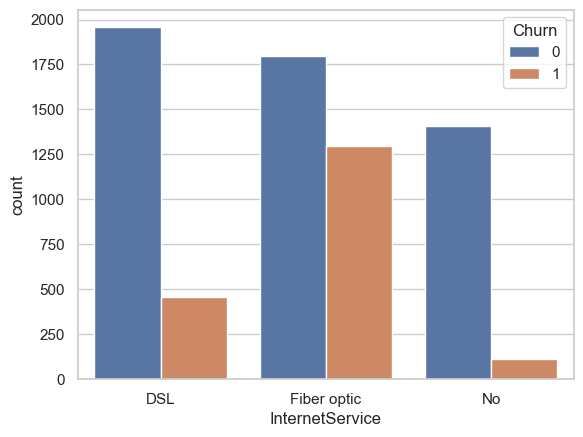

In [11]:
import seaborn as sns

sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

In [12]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

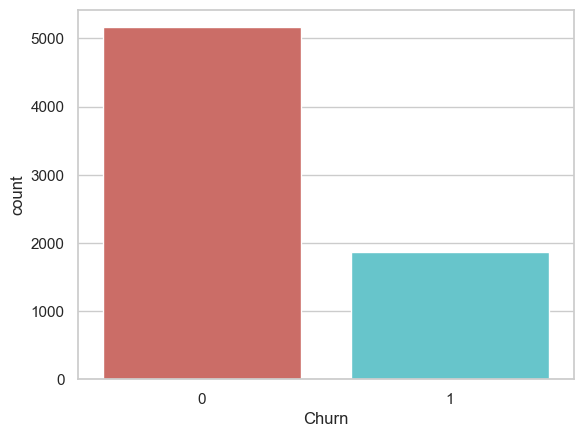

<Figure size 640x480 with 0 Axes>

In [13]:
sns.countplot(x='Churn',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [14]:
count_no_churn = len(df[df['Churn']==0])
count_churn = len(df[df['Churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

percentage of no churn is 73.42150170648463
percentage of churn 26.578498293515356


In [17]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.groupby('Dependents')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Dependents,,,
No,29.806000,67.002808,2187.709254
Yes,38.569319,59.617032,2507.955669


In [18]:
df.groupby('MultipleLines')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
MultipleLines,,,
No,24.170458,54.227651,1349.833058
No phone service,31.830882,41.992500,1500.433750
Yes,41.971014,82.084766,3527.700994


In [19]:
df.groupby('InternetService')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
InternetService,,,
DSL,32.889487,58.088017,2119.789259
Fiber optic,32.917959,91.500129,3205.304570
No,30.667763,21.076283,665.220329


In [20]:
df.groupby('TechSupport')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
TechSupport,,,
No,25.851671,74.584879,2089.886679
No internet service,30.667763,21.076283,665.220329
Yes,44.910784,80.718799,3818.111397


In [21]:
df.groupby('PaymentMethod')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,
Bank transfer (automatic),43.713359,67.205577,3079.299546
Credit card (automatic),43.297830,66.519264,3071.396022
Electronic check,25.174630,76.255814,2090.868182
Mailed check,21.938903,43.958354,1054.483915


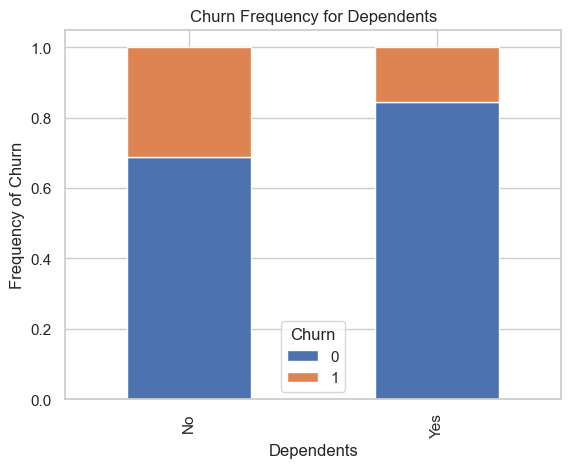

In [22]:
table=pd.crosstab(df.Dependents,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_Dependents')

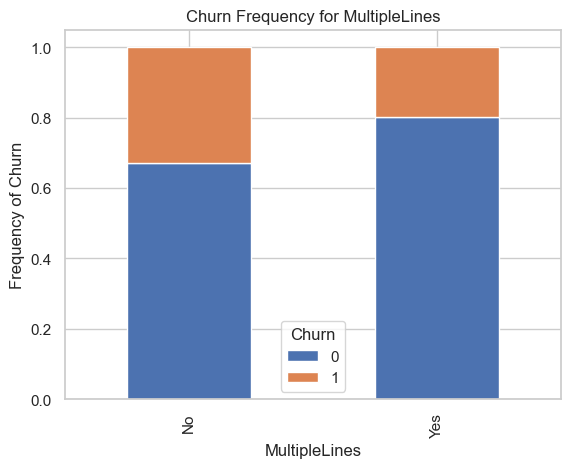

In [23]:
table=pd.crosstab(df.Partner,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_MultipleLines')

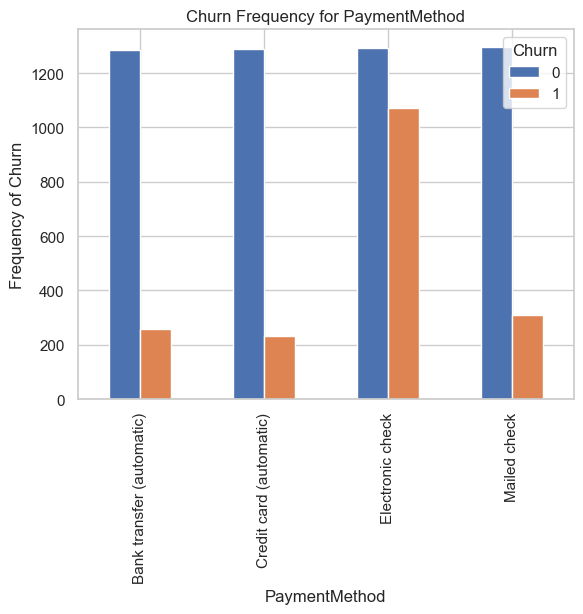

In [24]:
pd.crosstab(df.PaymentMethod,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_PaymentMethod')

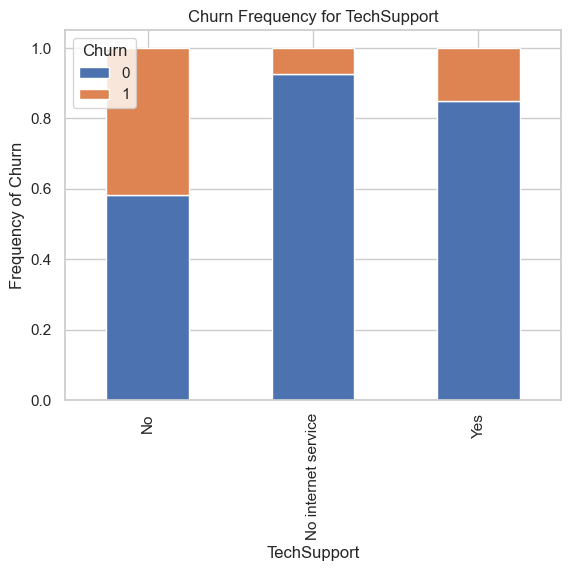

In [25]:
table=pd.crosstab(df.TechSupport,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_TechSupport')

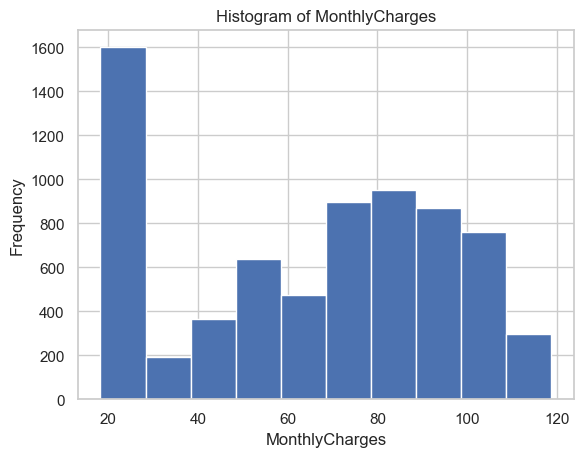

In [27]:
df.MonthlyCharges.hist()
plt.title('Histogram of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.savefig('hist_MonthlyCharges')

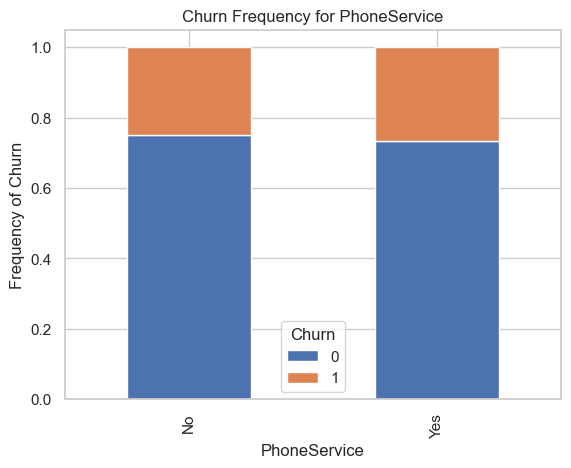

In [28]:
table=pd.crosstab(df.PhoneService,df.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Churn Frequency for PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_frequency_per_PhoneService')

## Criando as variáveis dummy

In [29]:
cat_vars=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen']
# criamos uma lista com as variáveis categóricas do df

for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var) # método get_dummies cria variáveis binárias para cada variável categórica  do df
    df=df.join(cat_list) #concatena as colunas dummies com o df original
data_vars=df.columns.values.tolist() #armazena todas as variáveis e colunas do df
to_keep=[i for i in data_vars if i not in cat_vars] #armazena todas as variáveis e nomes das colunas que são numéricas

In [30]:
data_final=df[to_keep] # criando lista que será usada para verificar a relevancia das variaveis para o algoritmo
data_final.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'P

## Sobreamostragem com SMOTE

Com nossos dados de treinamento criados, vou realizar o up-sample da classe sem churn usando o algoritmo SMOTE (Técnica de Oversampling Sintético para a Classe Minoritária). Em termos gerais, o SMOTE funciona da seguinte forma:

* Ele cria amostras sintéticas para a classe minoritária (sem churn) em vez de simplesmente fazer cópias dos dados existentes.
* O SMOTE seleciona aleatoriamente um dos "k-vizinhos mais próximos" e o utiliza para criar novas observações similares, mas com pequenas variações aleatórias.

In [31]:
X = data_final.loc[:, data_final.columns != 'Churn'] # declara as variáveis independentes x
y = data_final.loc[:, data_final.columns == 'Churn'] # declara a variável dependente y (Churn)

from imblearn.over_sampling import SMOTE # importa a classe SMOTE responsável pelo balanceamento de datasets

os = SMOTE(random_state=0) # cria uma instância da classe SMOTE com um valor aleatório
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # divide o dataset em treino e teste usado a divisão fixa (70% treino e 30% teste)
columns = X_train.columns # armazena os nomes das colunas das características do conjunto de treinamento (X_train)..
os_data_X,os_data_y=os.fit_resample(X_train, y_train) # aplica o SMOTE nos dados de treino para fazer o oversampling da classe minoritária balanceando o algoritmo
os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) # converte as variaveis sinteticas em df usando os nomes originais das colunas armazenados na variável "columns".
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn']) # converte a variável alvo sintetica em um df

# Verificando os resultados do oversampling
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  7216
Number of no churn in oversampled data 3608
Number of churn 3608
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Eliminação Recursiva de Atributos

In [32]:
data_final_vars=data_final.columns.values.tolist() # obtém uma lista com os nomes das colunas presentes no df data_final.
y=['Churn'] #Aqui, a variável Churn é definida como uma lista para ser prevista pelo modelo
X=[i for i in data_final_vars if i not in y] # cria a lista X que conterá todos os atributos que serão usados como entrada para o modelo

from sklearn.feature_selection import RFE # classe RFE (Recursive Feature Elimination) que visa eliminar as características menos importantes ou irrelevantes para melhorar o desempenho do modelo.
from sklearn.linear_model import LogisticRegression # classe LogisticRegression que será usada como o modelo de regressão logística para a seleção de atributos.

logreg = LogisticRegression() # Cria uma instância do modelo de Regressão Logística.
rfe = RFE(logreg, step = 15) # Cria um objeto RFE e especifica que desejamos selecionar 5 atributos menos importantes para a remoção em cada interação
rfe = rfe.fit(os_data_X, os_data_y.values.ravel()) # Aqui, o objeto RFE é ajustado aos dados. os_data_X representa as features do conjunto de treinamento após a aplicação da técnica SMOTE e os_data_y é o respectivo target após o mesmo processo.

print(rfe.support_) #Exibe um array booleano que indica quais atributos foram selecionados pelo RFE. O valor True em uma determinada posição do array significa que o atributo correspondente foi selecionado.
print(rfe.ranking_) #Exibe o ranking dos atributos. Aqueles com ranking 1 são considerados os mais importantes, e aqueles com valores mais altos são considerados menos importantes.

[False False False  True  True  True  True  True  True False  True  True
 False  True  True  True False  True False  True  True False  True  True
 False  True  True False False False False False False False False  True
  True  True False  True False False  True False False False]
[2 3 3 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 3 1 1 3 1 1 3 1 1 3 2 3 3 2 2 3 2 1 1
 1 3 1 2 2 1 3 3 2]


C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

In [33]:
rfe_ranking = rfe.ranking_ #armazenando as posições do rank

In [34]:
selected_features = []

for i, rank in enumerate(rfe_ranking):
    if rank == 1:  # Verificar se o valor em rfe.ranking_ é igual a 1
        selected_features.append(columns[i])  # Se sim, adicionar o valor correspondente em "column"s à lista selected_features

print(selected_features)

['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


## Implementando o modelo

In [35]:
cols = selected_features # seleciona apenas as variáveis relevantes
X=os_data_X[cols] # x recebe apenas as variáveis relevantes
y=os_data_y['Churn'] # y recebe a variável alvo

In [36]:
import statsmodels.api as sm # statsmodels é uma lib que fornece várias funções e classes para realizar análises estatísticas e ajuste de modelos.
logit_model=sm.Logit(y,X) # criando um objeto logit_model que representa o modelo de regressão logística. O primeiro argumento y é o vetor que contém a variável resposta (variável dependente) do modelo, e o segundo argumento X é a matriz (ou DataFrame) que contém as variáveis preditoras (variáveis independentes). O modelo logit é usado para modelar a relação entre a variável resposta binária e as variáveis preditoras.
result=logit_model.fit() # ajustando o modelo logit aos dados fornecidos. O método fit() realiza a estimação dos parâmetros do modelo usando os dados de entrada X e y. Ele encontra os coeficientes que melhor se ajustam aos dados para descrever a relação entre a variável resposta binária e as variáveis preditoras.
print(result.summary2()) # O método summary2() gera uma tabela com várias informações úteis sobre o modelo, incluindo os coeficientes estimados, seus erros padrão, estatísticas de teste (como o valor Z), valores p, intervalos de confiança para os coeficientes e outras métricas relevantes. 

         Current function value: 0.428583
         Iterations: 35
                                     Results: Logit
Model:                      Logit                    Method:                   MLE      
Dependent Variable:         Churn                    Pseudo R-squared:         0.382    
Date:                       2023-07-24 08:50         AIC:                      6231.3093
No. Observations:           7216                     BIC:                      6389.6426
Df Model:                   22                       Log-Likelihood:           -3092.7  
Df Residuals:               7193                     LL-Null:                  -5001.8  
Converged:                  0.0000                   LLR p-value:              0.0000   
No. Iterations:             35.0000                  Scale:                    1.0000   
----------------------------------------------------------------------------------------
                                Coef.    Std.Err.    z     P>|z|     [0.025     0

C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
cols = [col for col, selected in zip(cols, selected_features) if selected and col not in ["PhoneService_Yes", "MultipleLines_No","MultipleLines_Yes"]]
#retirando as variaveis com p-value > 0.5
X=os_data_X[cols]
y=os_data_y['Churn']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.473449
         Iterations 7
                                Results: Logit
Model:                   Logit                 Method:                MLE      
Dependent Variable:      Churn                 Pseudo R-squared:      0.317    
Date:                    2023-07-24 08:50      AIC:                   6872.8183
No. Observations:        7216                  BIC:                   7010.4995
Df Model:                19                    Log-Likelihood:        -3416.4  
Df Residuals:            7196                  LL-Null:               -5001.8  
Converged:               1.0000                LLR p-value:           0.0000   
No. Iterations:          7.0000                Scale:                 1.0000   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

## Modelagem de Regressão Logística

In [38]:
from sklearn.linear_model import LogisticRegression # classe utilizada para criar e treinar um modelo de regressão logística
from sklearn import metrics # a classe contém várias funções para avaliar a performance do modelo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # dividindo os dados em conjunto de treinamento e conjunto de teste com a função train_test_split() 
# Os argumentos X e y representam as variáveis preditoras e a variável resposta, respectivamente. O argumento test_size=0.3 
# define que 30% dos dados serão utilizados para formar o conjunto de teste, enquanto o restante (70%) 
# será utilizado para treinar o modelo. O argumento random_state=0 é usado para garantir que a divisão 
# seja feita de forma determinística, ou seja, sempre obteremos a mesma divisão de treinamento/teste quando executarmos o código novamente.

logreg = LogisticRegression() # o objeto logreg da classe LogisticRegression representa o modelo de regressão logística que será treinado. 

# A função fit() é usada para treinar o modelo com os dados de treinamento (X_train e y_train). Durante o treinamento, o modelo aprenderá os coeficientes (pesos) que melhor se ajustam aos dados de treinamento, de forma a realizar a previsão da variável resposta com base nas variáveis preditoras.
logreg.fit(X_train, y_train) #Após a execução do código, o objeto logreg conterá o modelo de regressão logística treinado, pronto para fazer previsões em novos dados não vistos.

LogisticRegression()

In [39]:
y_pred = logreg.predict(X_test) # A função predict() é aplicada ao modelo logreg com X_test como argumento, e ela retorna uma matriz contendo as previsões do modelo para o conjunto de teste. Essas previsões são armazenadas na variável y_pred.
print('Avurácia do classificador de regressão logística no conjunto de teste: {:.2f}'.format(logreg.score(X_test, y_test))) # calculando a acurácia do modelo de regressão logística no conjunto de teste. A acurácia é usada para avaliar a performance de modelos de classificação. Ela mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo.
#O método score() é aplicado ao modelo logreg com X_test e y_test como argumentos. Ele compara as previsões do modelo (armazenadas em y_pred) com as verdadeiras classes do conjunto de teste (y_test) e calcula a acurácia como a proporção de previsões corretas em relação ao total de amostras no conjunto de teste.

Avurácia do classificador de regressão logística no conjunto de teste: 0.84


## Matriz de confusão

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred) # A função confusion_matrix é usada para calcular a matriz de confusão, que é uma tabela que descreve o desempenho de um modelo de classificação em termos de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN).
print(confusion_matrix)

[[888 176]
 [160 941]]


O resultado nos mostra que temos 888+941 predições corretas e 160+176 predições incorretas.

* São 888 verdadeiros negativos
* 160 falsos negativos
* 176 falsos positivos
* 941 verdadeiros positivos

## Computando precision, recall, F-measure e support

In [41]:
from sklearn.metrics import classification_report #métricas de avaliação do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1064
           1       0.84      0.85      0.85      1101

    accuracy                           0.84      2165
   macro avg       0.84      0.84      0.84      2165
weighted avg       0.84      0.84      0.84      2165




Tradução de cada métrica conforme a citação do Scikit Learn:

* Precision:
A precisão é a razão tp / (tp + fp), onde tp é o número de verdadeiros positivos e fp é o número de falsos positivos. A precisão é intuitivamente a habilidade do classificador de não rotular uma amostra como positiva se ela for negativa.

* Recall:
A revocação é a razão tp / (tp + fn), onde tp é o número de verdadeiros positivos e fn é o número de falsos negativos. A revocação é intuitivamente a habilidade do classificador de encontrar todas as amostras positivas.

* F1-score:
A F-medida é interpretada como uma média harmônica ponderada da precisão e da revocação, onde a F-medida atinge seu melhor valor em 1 e pior valor em 0.

* Suporte:
O suporte é o número de ocorrências de cada classe em y_test.

Em resumo, essas métricas são utilizadas para avaliar o desempenho de um classificador em tarefas de classificação. A precisão mede a proporção de verdadeiros positivos entre todas as amostras classificadas como positivas, enquanto a revocação mede a proporção de verdadeiros positivos encontrados entre todas as amostras verdadeiramente positivas. A F-medida combina a precisão e a revocação em uma única métrica, sendo útil quando se deseja equilibrar o trade-off entre ambas. O suporte informa quantas amostras existem para cada classe na coleção de teste (y_test).

## Curva ROC

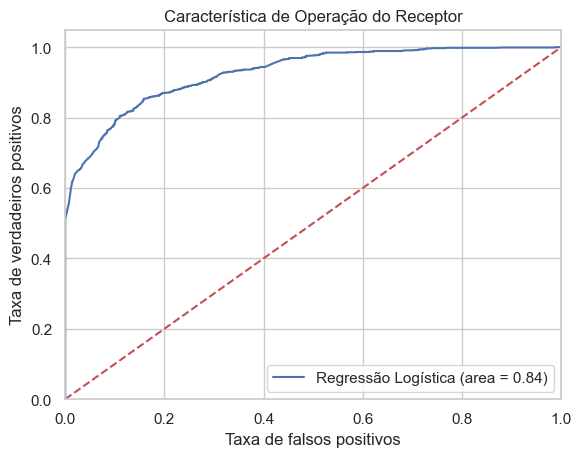

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) #essa função representa o desempenho geral do modelo, medindo a capacidade do modelo de distinguir entre as duas classes.
# y_test é uma matriz que contém as classes reais do conjunto de teste e logreg.predict(X_test) retorna as classes previstas pelo modelo de Regressão Logística para o conjunto de teste X_test.
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) #roc_curve é usada para calcular a taxa de falsos positivos (fpr), a taxa de verdadeiros positivos (tpr) e os limiares (thresholds) para diferentes pontos de corte da probabilidade de classificação. 
# A curva ROC é construída variando os limiares para avaliar o desempenho do modelo em diferentes pontos de operação.
# logreg.predict_proba(X_test)[:,1] retorna a probabilidade de ser da classe positiva (classe 1) para o conjunto de teste X_test. A coluna [:,1] é selecionada para obter as probabilidades da classe positiva.

# abaixo é a plotagem visual
plt.figure()
plt.plot(fpr, tpr, label='Regressão Logística (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Característica de Operação do Receptor')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()